<a href="https://colab.research.google.com/github/rosebaekfany/Machine-Learning/blob/main/HW4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '400110009'
first_name = 'juju'
last_name = 'Maleki'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [ ]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [ ]:
# TODO: Write your code here

data = pd.read_csv('spotify.csv')

relevant_features = ['track_name', 'track_artist', 'track_popularity', 'playlist_name', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms']

filtered_data = data[relevant_features]
print(filtered_data)

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity    playlist_name  danceability  energy 

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

Standard scaling is important when working with clustering algorithms because it helps to normalize the numerical features and bring them to a similar scale. It ensures that no single feature dominates the distance calculations or biases the clustering results.

If standard scaling is not employed and the features are on different scales, clustering algorithms may assign excessive importance to features with larger values. This can lead to incorrect clustering results, where the clusters are primarily driven by the features with larger scales. It may also cause difficulties in interpreting the relative importance of different features in the clustering process.

In [ ]:
# TODO: Write your code here

numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
numerical = data[numerical_features]

def standard_scaler(data):

    scaled_data = (data - np.mean(data, axis=0))/ np.std(data, axis=0)
    return  scaled_data

scaled_data= standard_scaler(numerical)

print(scaled_data)

       danceability    energy       key  loudness      mode  speechiness  \
0          0.642049  1.201614  0.173200  1.367123  0.876177    -0.481362   
1          0.490412  0.643317  1.557627  0.585766  0.876177    -0.688642   
2          0.138889  1.284529 -1.211227  1.100090 -1.141322    -0.324422   
3          0.435271  1.279002  0.450085  0.984309  0.876177    -0.050024   
4         -0.033426  0.742815 -1.211227  0.685151  0.876177    -0.702460   
...             ...       ...       ...       ...       ...          ...   
32828     -1.563583  1.234780 -0.934342  1.641519  0.876177    -0.132936   
32829     -0.915679  0.483014 -1.488113  0.755423  0.876177    -0.642251   
32830     -0.867431  0.676483  0.173200  0.609190 -1.141322    -0.582041   
32831     -0.198848  1.046839 -0.934342  1.123849  0.876177     0.019069   
32832     -0.357378  1.024728 -0.103686  0.718948 -1.141322    -0.676797   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.333

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [ ]:
# TODO: Write your code here
pca = PCA()
pca.fit(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

cutoff = 0.98

n_components = np.argmax(cumulative_variance_ratio >= cutoff) + 1
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(numerical)

reduced_data = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])

print(reduced_data)
print("n_components: ",n_components)

                 PC1        PC2       PC3       PC4       PC5       PC6  \
0      -31045.811646  -1.175310  0.684844 -3.893328 -0.465909 -0.026772   
1      -63199.811613  20.943541  5.648833 -1.558114 -0.591306 -0.142869   
2      -49183.811647  -3.135119 -4.278201 -3.027411  0.654338 -0.098814   
3      -56706.811637  -1.063773  1.694270 -2.596433 -0.488813  0.179866   
4      -36747.811639  -3.098884 -4.325792 -1.854184 -0.340727 -0.194587   
...              ...        ...       ...       ...       ...       ...   
32828  -21424.811658  -7.331999 -3.303546 -4.742544 -0.371752  0.288296   
32829  127320.188353  -7.282181 -5.456324 -2.971829 -0.293339  0.071107   
32830  -15687.811637  -7.114695  0.683080 -1.655047  0.541011  0.061048   
32831  141632.188348  -7.267133 -3.457969 -4.135521 -0.340056  0.191465   
32832  111700.188359  -7.203974 -0.421786 -2.726335  0.587360  0.504579   

            PC7       PC8       PC9      PC10      PC11  
0     -0.013556 -0.014343 -0.139069  0.02

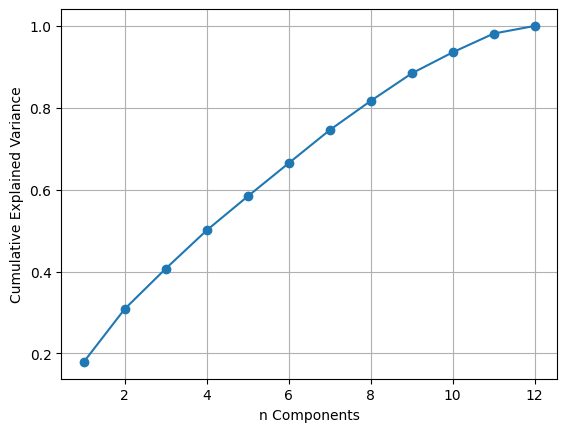

In [ ]:
xx= range(1, len(explained_variance_ratio) + 1)
plt.plot(xx, cumulative_variance_ratio, marker='o')
plt.xlabel('n Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Clustering

Implement K-means for clustering from scratch.

In [ ]:
def initialize_centroids(data, k):

    return data.sample(n=k).values

def assign_clusters(data, centroids):

    distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def recompute_centroids(data, labels, k):

    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def compute_wcss(data, labels, centroids):

    return sum(np.linalg.norm(data[labels == i] - centroids[i])**2 for i in range(len(centroids)))

def kmeans(data, k, max_iters=100, n_init=10):

    best_centroids = None
    best_labels = None
    best_wcss = float('inf')

    for _ in range(n_init):

        centroids = initialize_centroids(data, k)
        for _ in range(max_iters):
            labels = assign_clusters(data, centroids)
            new_centroids = recompute_centroids(data, labels, k)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        wcss = compute_wcss(data, labels, centroids)
        if wcss < best_wcss:
            best_centroids = centroids
            best_labels = labels
            best_wcss = wcss

    return best_labels, best_centroids, best_wcss


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

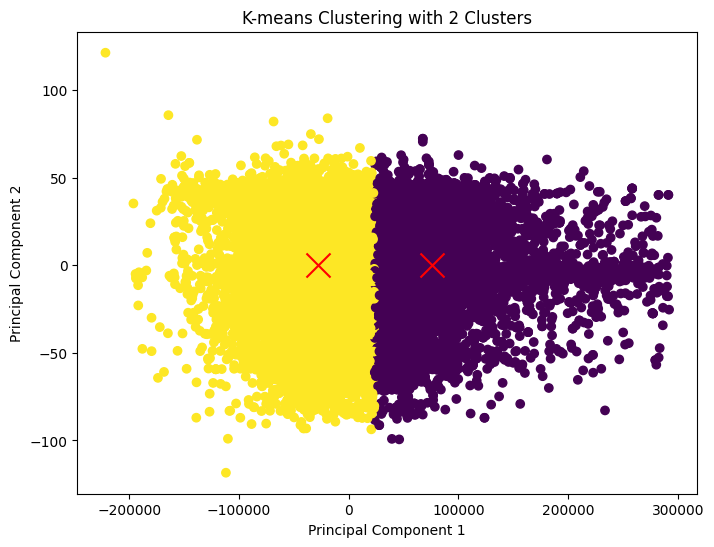

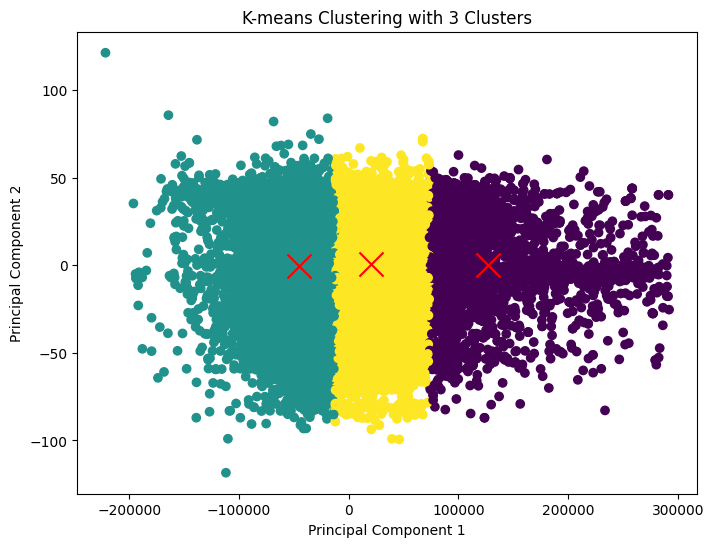

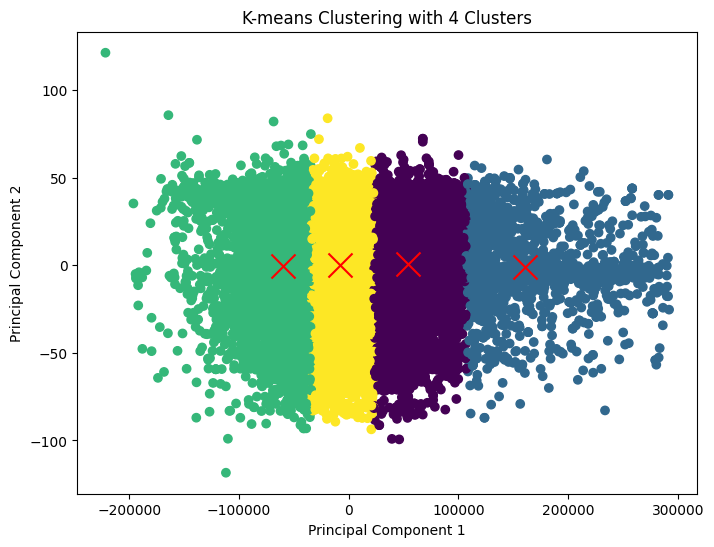

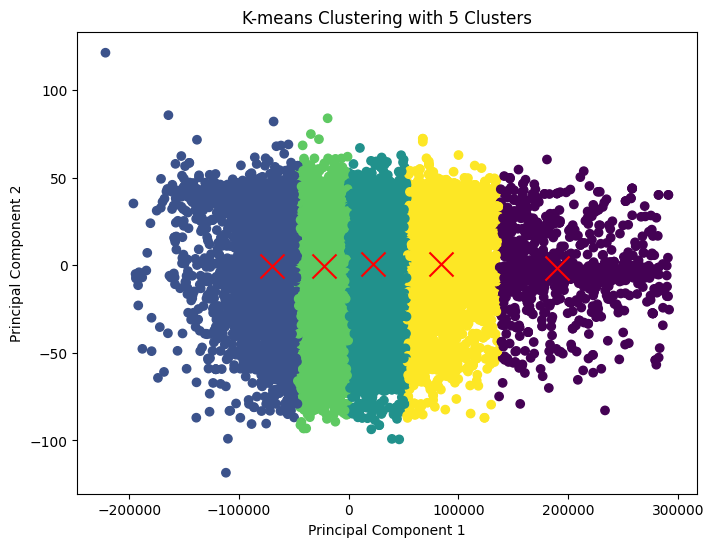

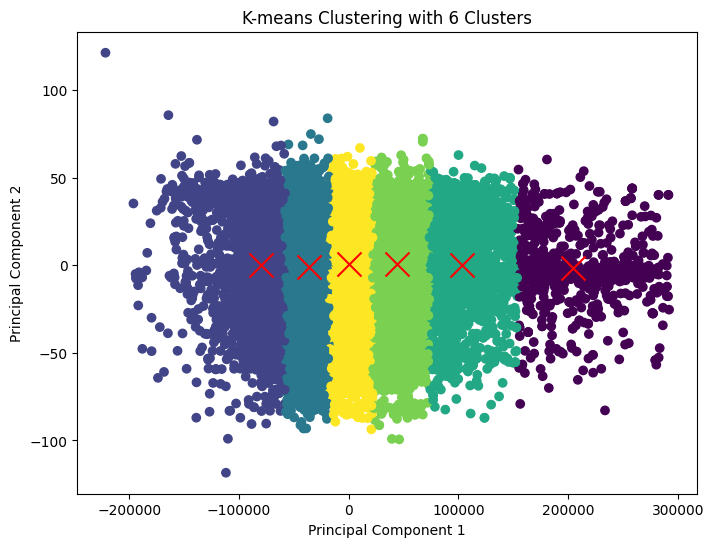

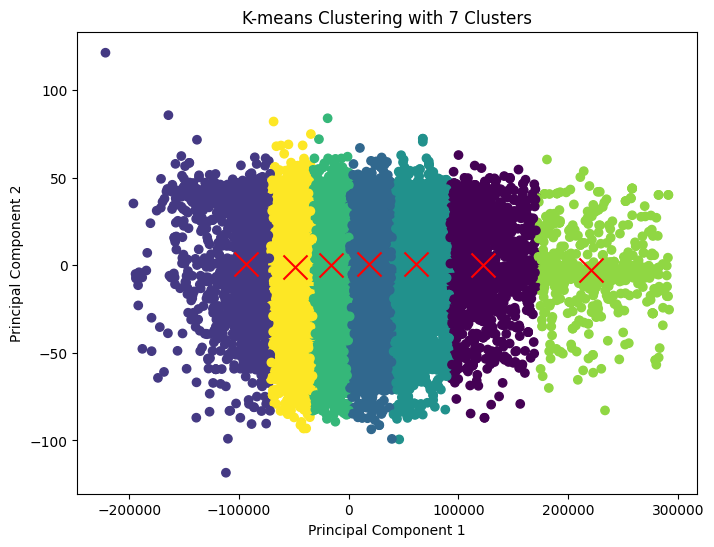

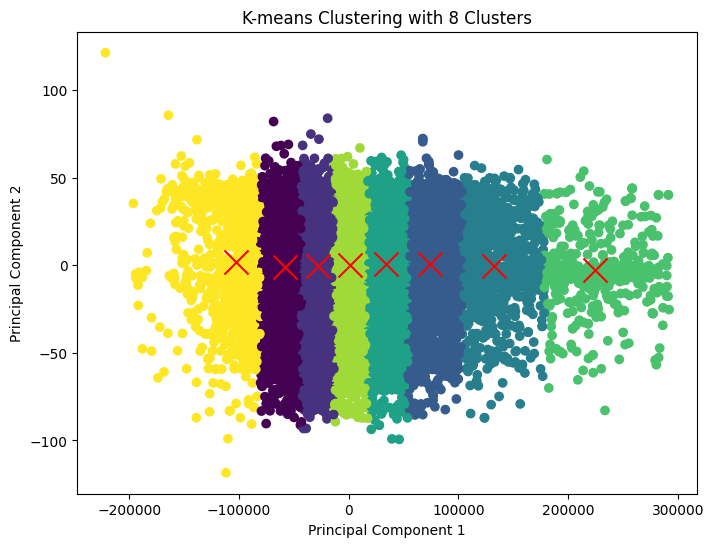

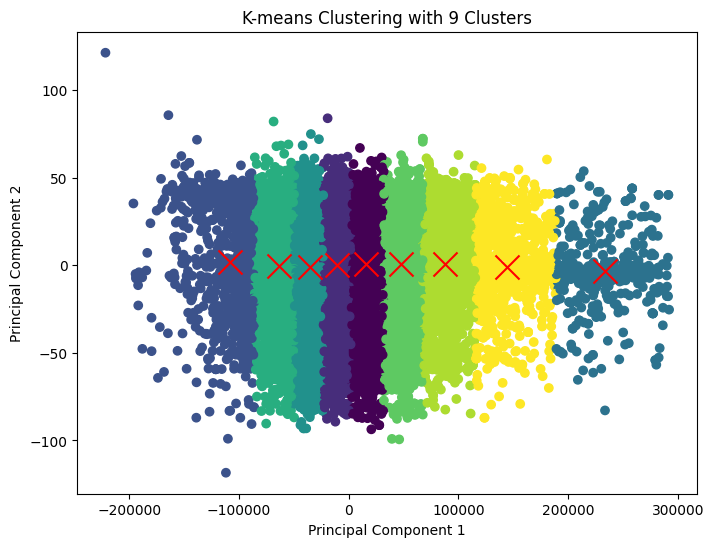

In [ ]:
# TODO: Write your code here

n_components = 2
pca = PCA(n_components=n_components)
reduced_data_1 = pca.fit_transform(numerical)
reduced_data = pd.DataFrame(reduced_data_1, columns=['PC1', 'PC2'])

if 'playlist_genre' in data.columns:
    genres = data['playlist_genre']
    reduced_data = pd.concat([reduced_data, genres.reset_index(drop=True)], axis=1)

silhouette_scores = []
wss_scores = []

for k in range(2, 10):

    labels, centroids, wcss = kmeans(reduced_data[['PC1', 'PC2']], k)
    silhouette_avg = silhouette_score(reduced_data[['PC1', 'PC2']], labels)
    silhouette_scores.append(silhouette_avg)
    wss_scores.append(wcss)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data['PC1'], reduced_data['PC2'], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')

    plt.title(f'K-means Clustering with {k} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

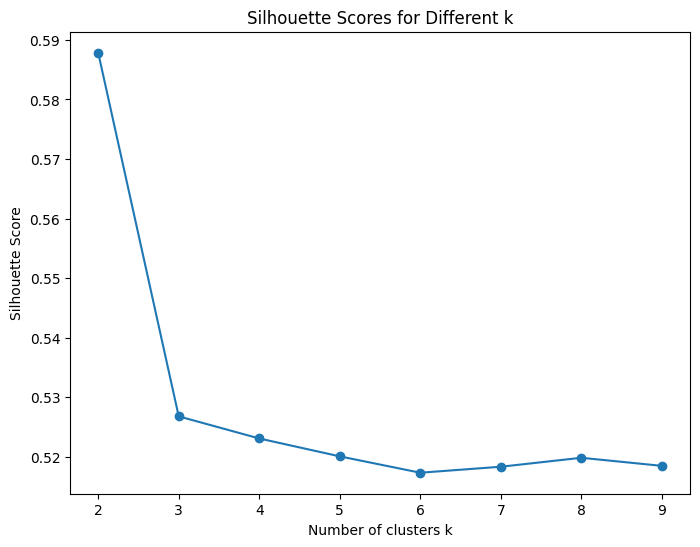

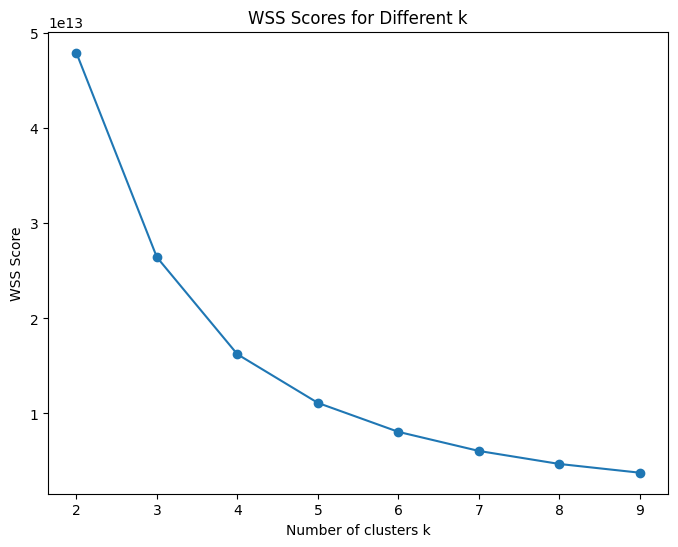

In [ ]:
# TODO: Write your code here

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.show()

# Plot WSS scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), wss_scores, marker='o')
plt.title('WSS Scores for Different k')
plt.xlabel('Number of clusters k')
plt.ylabel('WSS Score')
plt.show()

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [ ]:
# TODO: Write your code here
k = 6
labels, centroids, wcss = kmeans(reduced_data[['PC1', 'PC2']], k)

reduced_data['Cluster'] = labels

for cluster in range(k):

    cluster_songs = numerical[labels == cluster]
    if len(cluster_songs) >= 2:
        sampled_songs = cluster_songs.sample(n=2, random_state=1)
        distance = np.linalg.norm(sampled_songs.iloc[0] - sampled_songs.iloc[1])
        print(f"Distance between two random songs in cluster {cluster}: {distance}")
        print(sampled_songs)


Distance between two random songs in cluster 0: 47026.0194273727
       danceability  energy  key  loudness  mode  speechiness  acousticness  \
15735         0.179   0.953    5    -2.686     1       0.2020      0.000015   
15160         0.497   0.693    8    -7.024     1       0.0565      0.190000   

       instrumentalness  liveness  valence    tempo  duration_ms  
15735           0.00109     0.363    0.337  153.955       249467  
15160           0.00000     0.215    0.358  111.539       296493  
Distance between two random songs in cluster 1: 21291.018912215044
       danceability  energy  key  loudness  mode  speechiness  acousticness  \
18239         0.677   0.757    7    -2.864     0        0.168        0.0449   
6435          0.619   0.798   11    -5.517     0        0.381        0.1680   

       instrumentalness  liveness  valence    tempo  duration_ms  
18239               0.0     0.117    0.643  184.119       194984  
6435                0.0     0.170    0.710  156.151      

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

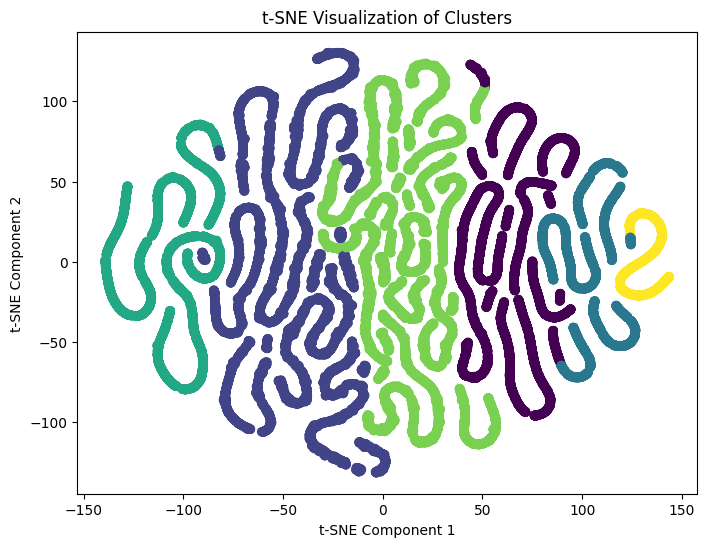

In [ ]:
# TODO: Write your code here
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(numerical)
tsne_data = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_data['Cluster'] = labels

plt.figure(figsize=(8, 6))
plt.scatter(tsne_data['TSNE1'], tsne_data['TSNE2'], c=tsne_data['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()